In [1]:
import pandas as pd,warnings,numpy as np,matplotlib.pyplot as plt,seaborn as sns,statsmodels.api as sm
from sklearn.datasets import load_digits,load_iris
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

# BINARY (DROP 1 CATEGORICAL)

In [2]:
df = sns.load_dataset('iris')
df.species.unique()
df.isnull().sum()
df = df[df['species']!='setosa']
#Hay bị lỗi khúc này vì enter nhiều lần sẽ bị nan, nên enter 1 lần thôi
df['species'] = df['species'].map({'versicolor':0,'virginica':1})
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# LOGISTIC(sklearn)
+ C: inverse of regularization strength
+ penalty: type of regularization
+ solver: algorithm used for optimization

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



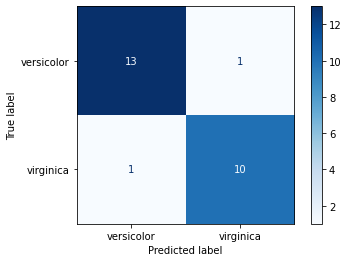

In [10]:
#elasticnet là sự kết hợp giữa L1 và L2
parameters = {'penalty':['l2'],'C':[1,2,3,4,5,6,10,20,30,50],'max_iter':[100,200,300]}
classifier = LogisticRegression()
classifier_regressor = GridSearchCV(classifier,param_grid=parameters,scoring='accuracy',cv=10)
classifier_regressor.fit(X_train,y_train)
classifier_regressor.best_params_
classifier_regressor.best_score_
y_pred = classifier_regressor.predict(X_test)
score = accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
plot_confusion_matrix(classifier_regressor,X_test,y_test,display_labels=['versicolor', 'virginica'],cmap=plt.cm.Blues);

# LOGISTIC (statsmodels)

In [ ]:
x = sm.add_constant(X_train)
model = sm.Logit(y_train,x)
result = model.fit(method='newton')
# print(result.params)
# print(result.predict(x))
# print(result.summary())

# PRACTICE 1:

In [ ]:
df = pd.read_csv(r"C:\Users\ADMIN\Documents\Data_Science\Data\HR_comma_sep.csv")
# pd.crosstab(df.salary,df.left).plot(kind='bar')
sub_df = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
#Prefix giúp đổi tên cột có dấu _
salary_dummies = pd.get_dummies(sub_df.salary, prefix="salary")
df_with_dummies = pd.concat([sub_df,salary_dummies],axis='columns')
df_with_dummies.drop(columns = 'salary',inplace=True)
X = df_with_dummies
y = df.left
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)
model = LogisticRegression().fit(X_train, y_train)
model.predict(X_test)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

# PRACTICE 2:

In [ ]:
df = pd.read_csv(r"C:\Users\ADMIN\Documents\Data_Science\Data\insurance_data.csv")
# plt.scatter(df.age,df.bought_insurance,marker='+',color='red')
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,test_size=0.3)
parameters = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,50],'max_iter':[100,200,300]}
model_logistic = LogisticRegression().fit(X_train, y_train)
model = GridSearchCV(model_logistic,param_grid = parameters,scoring = 'f1',cv=5)
model.fit(X_train,y_train)
model.best_params_
model.best_score_
y_pred = classifier_regressor.predict(X_test)
score = accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
print('Coefficents: ',model_logistic.coef_)
print('Intercept: ',model_logistic.intercept_)

# MULTICLASS (PRACTICE 1)

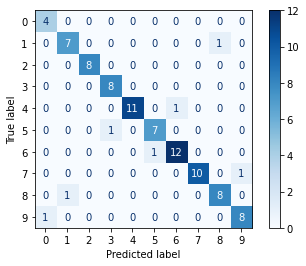

In [34]:
digits = load_digits()
# for i in range(10):
#     plt.matshow(digits.images[i])
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.05)
model = LogisticRegression().fit(X_train, y_train)
model.score(X_test, y_test)
model.predict(digits.data[0:5])
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues)

# MULTICLASS (PRACTICE 2)

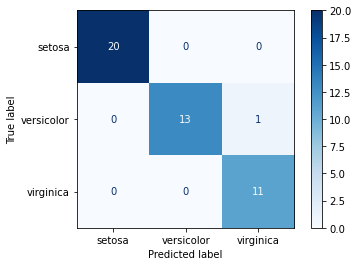

In [32]:
X_train, X_test, y_train, y_test = train_test_split(load_iris().data,load_iris().target, test_size=0.3, random_state=12)
parameters = {'penalty':['l2'],'C':[1,2,3,4,5,6,10,20,30,50],'max_iter':[100,200,300]}
model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)

model_cv = GridSearchCV(model_logistic,param_grid = parameters,cv=5).fit(X_train,y_train)
model_cv.best_params_
model_cv.best_score_
model_cv.score(X_test,y_test)

y_pred = model_cv.predict(X_test)
model_cv.predict_proba(X_test)
model_logistic.coef_
model_logistic.intercept_
plot_confusion_matrix(model_logistic,X_test,y_test,display_labels=['setosa', 'versicolor', 'virginica'],cmap=plt.cm.Blues);

In [27]:
# # Create one-vs-rest logistic regression object
# clf = LogisticRegression(random_state=0, multi_class='ovr')